In [2]:
# import all required libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#READ THE DATSET: Here I ve used Titanic dataset 
df = pd.read_csv("used.csv")
#First 5rows of dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#last 5rows of dataset
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
print(df.info())  #info abt dataset including missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
#Check for non-null values in datset
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

so, from above function we got to know (Age),(Cabin) & (Embarked) have null values

In [7]:
# check the dimension of dataset
df.shape

(891, 12)

In [8]:
# check for total number of element in dataset , it includes both non-null and null values
df.size

10692

In [9]:
# Check for missing values
missing_values = df.isnull().sum()

In [10]:
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


so, from above it is identified age:177, cabin:687 & embarked:2 have missing values.

In [11]:
#percentage of missing value
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


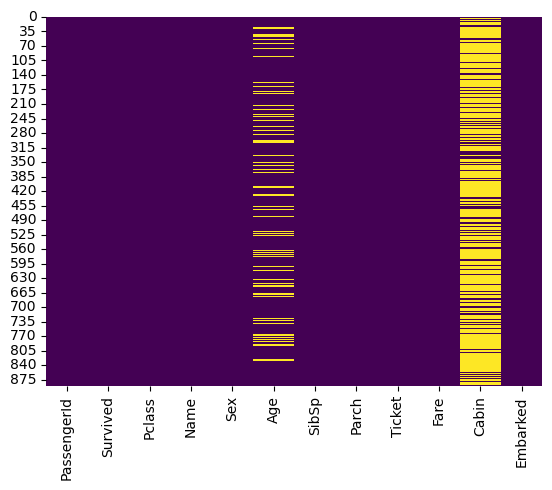

In [12]:
#visualize the missing data
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.show()

In [13]:
#Handle the missing values

so, here for numerical value fill it with mean  and for categorical value fill it with 'unknown'

In [14]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

In [15]:
categorical_columns = df.select_dtypes(include='object').columns
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

In [16]:
# Chcek if any missing value is left after handling
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [17]:
df.count() #so here u can see number of elements in each columns are eqaul now that means there is no missing value now in dataset

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
dtype: int64

In [18]:
df.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [19]:
#save the dataset
df.to_csv('usedcleaned_dataset.csv', index=False)

So in given data we can see the diff ranges in age & fare so for these two columns we ll check outliers

<Axes: xlabel='Fare'>

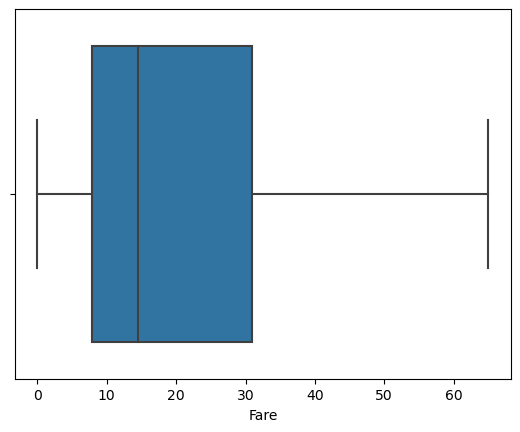

In [20]:
#visualization of outliers in dataset
sns.boxplot(x=df.Fare,showfliers=False)

<Axes: xlabel='Age'>

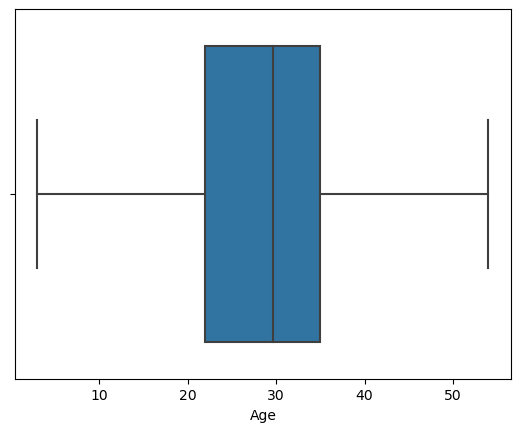

In [21]:
sns.boxplot(x=df.Age,showfliers=False)

In [22]:
#check the outliers for fare column
def remove_outliers_IQR(df, Fare, threshold=1.5):
    q1 = df["Fare"].quantile(0.25)
    q3 = df["Fare"].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return df[(df["Fare"] >= lower_bound) & (df['Fare'] <= upper_bound)]



In [23]:
columns_to_check = ['Fare']
for col in columns_to_check:
    df1 = remove_outliers_IQR(df, col)
#here df1 is new dataframe with no missing values and without outliers in fare column

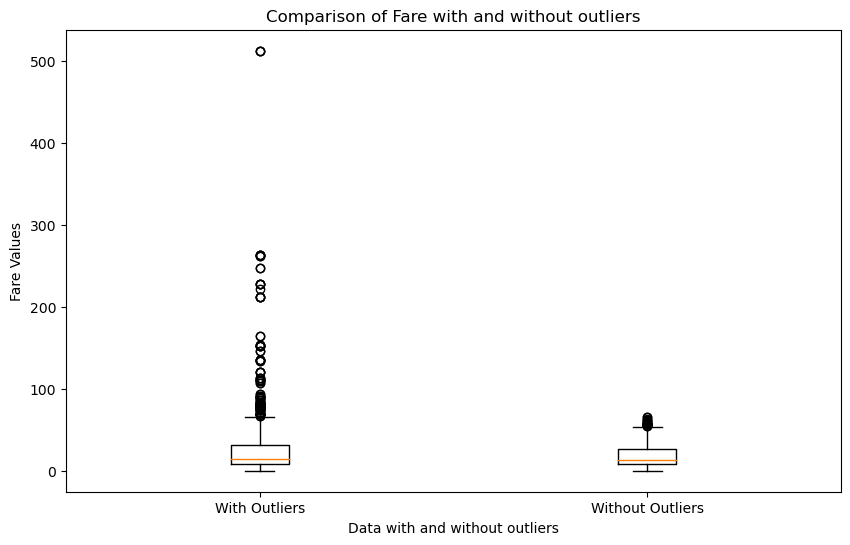

In [24]:
#comparsion between with and without outliers in fare column for better understanding
plt.figure(figsize=(10, 6))
plt.boxplot([df['Fare'], df1['Fare']], labels=['With Outliers', 'Without Outliers'])
plt.title('Comparison of Fare with and without outliers')
plt.xlabel('Data with and without outliers')
plt.ylabel('Fare Values')
plt.show()


In [25]:
#check the outliers for age column
def remove_outliers_IQR(df, Fare, threshold=1.5):
    q1 = df1["Age"].quantile(0.25)
    q3 = df1["Age"].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return df1[(df1["Age"] >= lower_bound) & (df1['Age'] <= upper_bound)]

In [26]:
columns_to_check = ['Age']
for col in columns_to_check:
    df2 = remove_outliers_IQR(df1, col)
    #here df2 is new dataframe with no missing values and without outliers in fare & age column

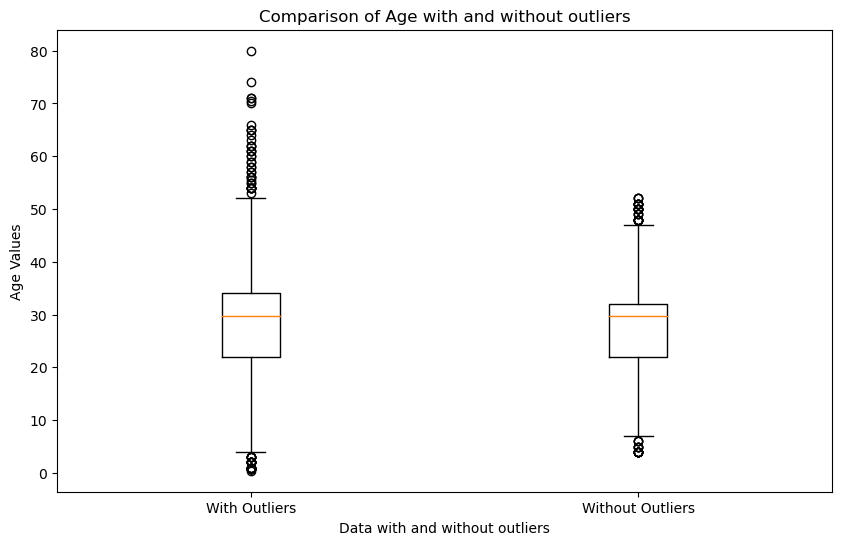

In [27]:
#comparsion between with and without outliers in age column for better understanding
plt.figure(figsize=(10, 6))
plt.boxplot([df1['Age'], df2['Age']], labels=['With Outliers', 'Without Outliers'])
plt.title('Comparison of Age with and without outliers')
plt.xlabel('Data with and without outliers')
plt.ylabel('Age Values')
plt.show()